In [333]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from IPython.display import Audio
from numpy.fft import fft, ifft
import wave
from scipy import signal

In [334]:
obj = wave.open("speech.wav", "rb")
frames = obj.readframes(-1)
print(obj.getparams())
fr = np.frombuffer(frames, dtype=np.int16)
fr = fr.copy()
print(len(fr))

_wave_params(nchannels=1, sampwidth=2, framerate=24000, nframes=205824, comptype='NONE', compname='not compressed')
205824


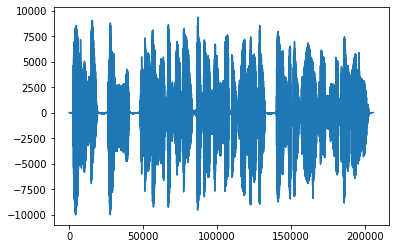

In [335]:
plt.figure()
plt.plot(fr)
plt.show()

In [336]:
"""
obj = wave.open('speech.wav', 'r')
# Set the parameters for the output file.
par = list(obj.getparams())
par[3] = 0  # The number of samples will be set by writeframes.
par = tuple(par)
ww = wave.open('output2.wav', 'w')
ww.setparams(par)


fw = 200
sw = obj.getframerate()//fw

for i in range(int(obj.getnframes()/sw)):
    frcut = np.fromstring(obj.readframes(sw), dtype=np.int16)

    fftfr = np.fft.rfft(frcut)
    freq = np.fft.rfftfreq(len(fr), d=1./obj.getframerate())
    fftfr = np.roll(fftfr, 1)
    fftfr[0:1] = 0
    fr = np.fft.irfft(fftfr).astype(np.int16)
    ww.writeframes(fr.tostring())
Audio(filename="output2.wav")
"""

'\nobj = wave.open(\'speech.wav\', \'r\')\n# Set the parameters for the output file.\npar = list(obj.getparams())\npar[3] = 0  # The number of samples will be set by writeframes.\npar = tuple(par)\nww = wave.open(\'output2.wav\', \'w\')\nww.setparams(par)\n\n\nfw = 200\nsw = obj.getframerate()//fw\n\nfor i in range(int(obj.getnframes()/sw)):\n    frcut = np.fromstring(obj.readframes(sw), dtype=np.int16)\n\n    fftfr = np.fft.rfft(frcut)\n    freq = np.fft.rfftfreq(len(fr), d=1./obj.getframerate())\n    fftfr = np.roll(fftfr, 1)\n    fftfr[0:1] = 0\n    fr = np.fft.irfft(fftfr).astype(np.int16)\n    ww.writeframes(fr.tostring())\nAudio(filename="output2.wav")\n'

c:\Users\jafil\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\jafil\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


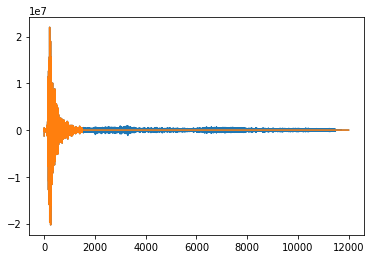

In [337]:
fftfr = np.fft.rfft(fr)
plt.figure()

freq = np.fft.rfftfreq(len(fr), d=1./obj.getframerate())
plt.plot(freq, fftfr)

#fftfr = np.roll(fftfr, 5000)
#fftfr[0:5000] = 0

for i, val in enumerate(freq):
    if val > 1500:
        fftfr[i] = 0

plt.plot(freq, fftfr)
fr = np.fft.irfft(fftfr).astype(np.int16)
plt.show()

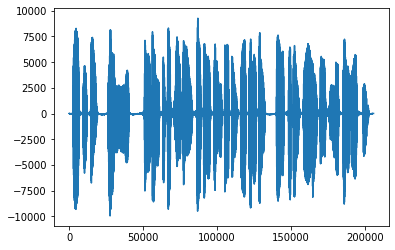

205824


In [338]:
plt.plot(fr)
plt.show()
print(len(fr))

In [339]:
import main
import importlib

importlib.reload(main)
main.run()

In [340]:
#fr = main.addEcho(obj, fr, 0.2, 0.7)

In [341]:
obj_new = wave.open("output2.wav", "wb")

obj_new.setnchannels(obj.getnchannels())
obj_new.setsampwidth(obj.getsampwidth())
obj_new.setframerate(obj.getframerate())
obj_new.writeframes(b''.join(fr))
Audio(filename="output2.wav")